In [1]:
# Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
api_key = "f14b5199"

url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="

movies = ["Aliens", "Sing", "Moana","oihihi","John Wick: chapter 2","Monster's Ball","Forrest Gump","Top Gun","The Matrix","Avatar","American Beauty","The Terminal","Bird Cage","Jurassic World","Black Panther: Wakanda Forever","The Secret Life of Pets","Transformers: Dark of the Moon","Frozen","Toy Story 4","The Hunger Games","A THOUSAND WORDS","GOTTI","THE LAST DAYS OF AMERICAN CRIME","THE DISAPPOINTMENTS ROOM","MAX STEEL"]

responses = []
meta_score = []
imdb_score = []
boxoffice = []
genre = []

# Make a request to the OMDb API for each movie in the list.
for movie in movies:
    movie_data = requests.get(url + movie).json()
   
    try:
        mscore = float(movie_data["Metascore"])
        iscore = float(movie_data["imdbRating"])
        boffice = float((movie_data["BoxOffice"].replace('$', '')).replace(',', ''))
        mtype = movie_data["Genre"]
        #print(f"{movie} is an {mtype} movie with a IMDB sorec of {iscore}, a Meta score of {mscore}, and made {boffice} at the box office")
        #print("---------------------")
        meta_score.append(mscore)
        imdb_score.append(iscore)
        boxoffice.append(boffice)
        genre.append(mtype)
    except:
        print(f"{movie} not found")
        print("---------------------")
        pass
   


oihihi not found
---------------------
Bird Cage not found
---------------------
Black Panther: Wakanda Forever not found
---------------------
THE LAST DAYS OF AMERICAN CRIME not found
---------------------


The correlation strength between IMDB score and boxoffice earnings is 0.38
The equation of the line is y = 62025082.33x + -192518002.11


Text(0, 0.5, 'Boxoffice Earnings ($100Ms)')

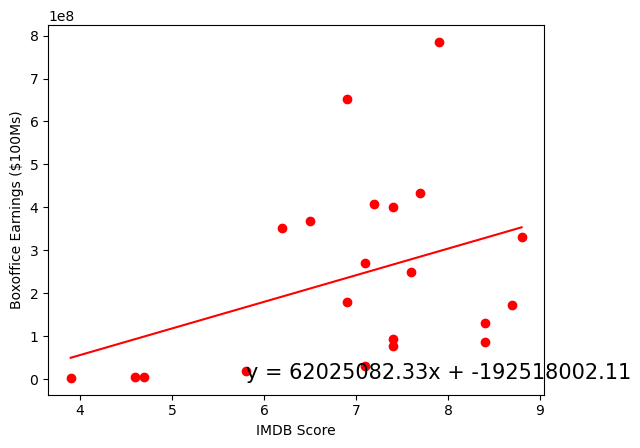

In [24]:
#IMDB Score vs Block Office Success
#Create dataframe with sorted IMDB scores
per_IMDB_score = pd.DataFrame({"IMDB Score":imdb_score,"Box Office Earnings":boxoffice})
sorted_IMBD_score = per_IMDB_score.sort_values("IMDB Score", ascending = True)
sorted_IMBD_score

#Plot IMDB scores vs earnings
plt.scatter(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1],marker = "o", color = "red")

#Determine strenght of relationship between IMDB score and boxoffice earnings
IMDB_correlation = st.pearsonr(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1])
print(f"The correlation strength between IMDB score and boxoffice earnings is {round(IMDB_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope, intercept, rvalue, pvalue, stderr) = linregress(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1])
regress_values = (sorted_IMBD_score.iloc[:,0])* slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation of the line is {line_eq}")
plt.plot(sorted_IMBD_score.iloc[:,0],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize = 15, color = "black")
plt.xlabel('IMDB Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')

In [12]:
sorted_IMBD_score

,IMDB Score,Box Office Earnings
19,3.9,2423468.0
20,4.6,3818664.0
18,4.7,4343227.0
17,5.8,18450127.0
13,6.2,352390543.0
12,6.5,368384330.0
6,6.9,180258178.0
11,6.9,653406625.0
1,7.1,270578425.0
4,7.1,31273922.0


In [25]:
genre.split(',')

AttributeError: 'list' object has no attribute 'split'

In [44]:
ind_genre = []
first_genre = []
for row in genre:
    first_genre.append(row[0])
    ind = row.split(',')
    print(row)
    for i in ind:
        ind_genre.append(i)
        


Action, Adventure, Sci-Fi
Animation, Comedy, Family
Animation, Adventure, Comedy
Action, Crime, Thriller
Drama, Romance
Drama, Romance
Action, Drama
Action, Sci-Fi
Action, Adventure, Fantasy
Drama
Comedy, Drama, Romance
Action, Adventure, Sci-Fi
Animation, Adventure, Comedy
Action, Adventure, Sci-Fi
Animation, Adventure, Comedy
Animation, Adventure, Comedy
Action, Adventure, Sci-Fi
Comedy, Drama, Fantasy
Biography, Crime, Drama
Drama, Horror, Thriller
Action, Adventure, Fantasy


In [46]:
len(first_genre)

21

In [36]:
len(genre)

21

In [37]:
len(ind_genre)

57

In [39]:
pd.DataFrame(ind_genre).value_counts()

 Adventure    10
Action         9
 Comedy        5
 Sci-Fi        5
Animation      5
 Drama         4
Drama          4
 Fantasy       3
 Romance       3
 Crime         2
 Thriller      2
Comedy         2
 Family        1
 Horror        1
Biography      1
dtype: int64